In [453]:
import pandas as pd
import numpy as np

from datetime import date
from datetime import time
from datetime import datetime
%matplotlib notebook

build a classification model predicting whether candidate will get hired 

In [431]:
train= pd.read_csv(r'C:\Users\Admin\Downloads\Hiring_Challenge.csv')


In [530]:
tt=pd.read_csv(r'C:\Users\Admin\Downloads\Hiring_Challenge.csv')

In [413]:
print('Shape of train Data :', train.shape)

Shape of train Data : (690, 16)


In [432]:
train.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [433]:
train['Hired'].value_counts()

0    383
1    307
Name: Hired, dtype: int64

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


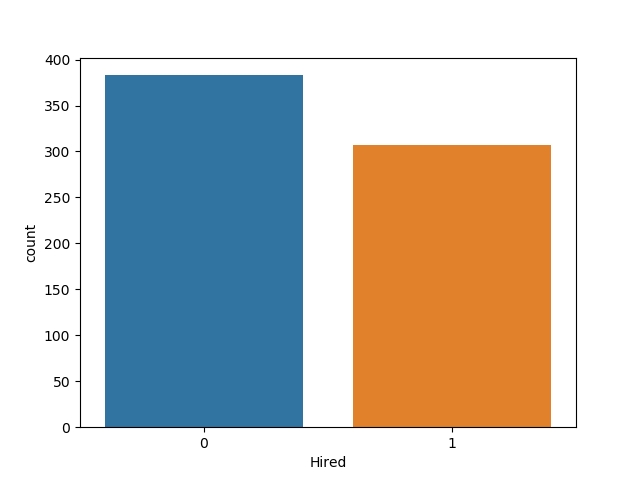

In [417]:
%matplotlib
import seaborn as sns
sns.countplot(x='Hired',data=train )

our target class mostly balanced no need to perform any imbalnce techn

#data is balanced no need to do perform any balance  tyechnique

In [434]:
print(f'Number of samples in train: {train.shape[0]}')
print(f'Number of columns in train: {train.shape[1]}')


Number of samples in train: 690
Number of columns in train: 16


In [435]:
#train.isnull().any()

for col in train.columns:
    if train[col].isnull().any():
        print(col, train[col].isnull().sum())


#No missing values

In [420]:
train.dtypes

C1        object
C2        object
C3       float64
C4        object
C5        object
C6        object
C7        object
C8       float64
C9        object
C10       object
C11        int64
C12       object
C13       object
C14       object
C15        int64
Hired      int64
dtype: object

#most of the features are not numeric we need to convert the categorice into numeric

from the above result shows columns C2 & C14 are object but both c2 & c14 are numeric,so somwhere values are to be text,
so we need to avoid that values 

special symbol ? is place in 12 positons 

In [69]:
##train['C2'] = train['C2'].str.replace('?', '0')
##train['C14'] = train['C14'].str.replace('?', '0')

In [82]:
#train['C14'] = train.C14.astype(int)

In [414]:
#train.drop_duplicates(subset=['C4','C5','C6','C7',''], keep=False)

In [402]:
train['C2'].value_counts()

?        12
22.67     9
20.42     7
18.83     6
23.58     6
22.5      6
25        6
24.5      6
19.17     6
20.67     6
33.17     5
27.83     5
23        5
23.25     5
23.08     5
27.67     5
23.5      4
25.67     4
26.17     4
29.5      4
34.17     4
35.17     4
20.75     4
22.08     4
22.92     4
24.75     4
25.17     4
32.33     4
28.58     4
24.58     4
         ..
62.75     1
31.42     1
45.33     1
33.5      1
33.92     1
53.92     1
27.17     1
37.58     1
49.5      1
32.83     1
26.08     1
30.25     1
13.75     1
47.33     1
58.58     1
58.67     1
41.42     1
26.58     1
28.08     1
55.75     1
49.17     1
28.42     1
41.92     1
48.33     1
17.25     1
25.5      1
38.42     1
57.83     1
36.42     1
24.17     1
Name: C2, Length: 350, dtype: int64

In [ ]:
12 value are places as ? so weed ne drop or fill with mean values so 

In [436]:

# Get names of indexes for which column Age has value 30
indexNames = train[ train['C2'] == '?' ].index

# Delete these row indexes from dataFrame
train.drop(indexNames , inplace=True)


In [404]:
train.shape

(678, 16)

In [437]:
indexNames2 = train[ train['C14'] == '?' ].index

In [438]:
train.drop(indexNames2, inplace=True)

In [439]:
train.shape

(666, 16)

In [440]:
train.dtypes

C1        object
C2        object
C3       float64
C4        object
C5        object
C6        object
C7        object
C8       float64
C9        object
C10       object
C11        int64
C12       object
C13       object
C14       object
C15        int64
Hired      int64
dtype: object

In [441]:
train['C14'] = train.C14.astype(int)

In [442]:
train['C2'] = train.C2.astype(float)

In [284]:
train.dtypes

C1        object
C2       float64
C3       float64
C4        object
C5        object
C6        object
C7        object
C8       float64
C9        object
C10       object
C11        int64
C12       object
C13       object
C14        int32
C15        int64
Hired      int64
dtype: object

In [443]:
train.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [444]:
train['C1'].value_counts()

b    451
a    203
?     12
Name: C1, dtype: int64

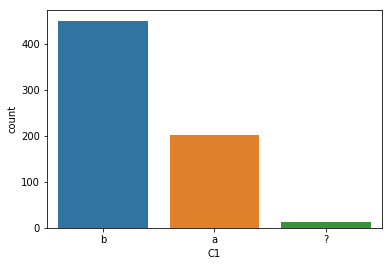

In [447]:
%matplotlib inline
import seaborn as sns
sns.countplot(x='C1',data=train )

In [448]:
table0= pd.crosstab(index=train['C1'],columns=train['Hired'])
table0.head()

Hired,0,1
C1,,
?,9,3
a,108,95
b,250,201


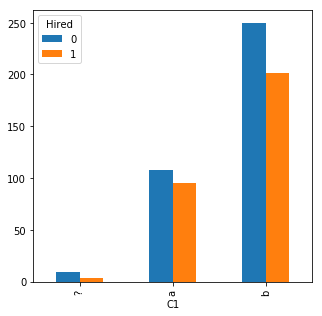

In [449]:
table0.plot(kind='bar',figsize=(5,5),stacked=False)

In [450]:
train['C4'].value_counts()

u    508
y    156
l      2
Name: C4, dtype: int64

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


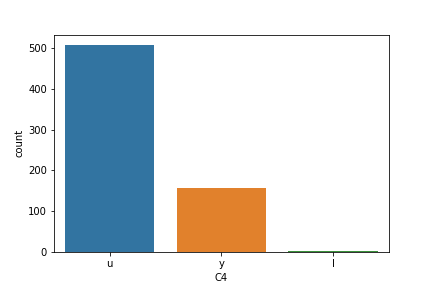

In [454]:
%matplotlib
import seaborn as sns
sns.countplot(x='C4',data=train )

In [455]:
table= pd.crosstab(index=train['C4'],columns=train['Hired'])
table.head()

Hired,0,1
C4,,
l,0,2
u,256,252
y,111,45


<IPython.core.display.Javascript object>


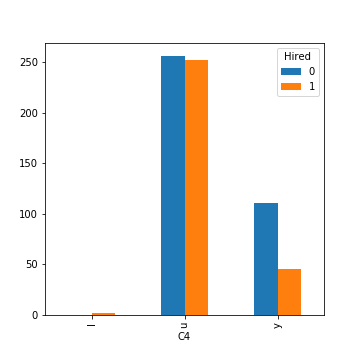

In [456]:
table.plot(kind='bar',figsize=(5,5),stacked=False)

# C4 Feature have 3 class but Class Label I have only 2 values while training a model it will effect the model learning so we need to delete this class

In [457]:
# Get names of indexes for which column Age has value 30
indexNames = train[ train['C4'] == 'l' ].index



In [459]:
# Delete these row indexes from dataFrame
train.drop(indexNames , inplace=True)


In [460]:
train.shape

(664, 16)

In [461]:
train['C5'].value_counts()

g    508
p    156
Name: C5, dtype: int64

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


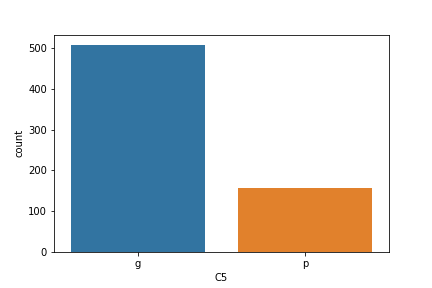

In [462]:

%matplotlib
import seaborn as sns
sns.countplot(x='C5',data=train )

In [463]:
table2= pd.crosstab(index=train['C5'],columns=train['Hired'])
table2.head()

Hired,0,1
C5,,
g,256,252
p,111,45


<IPython.core.display.Javascript object>


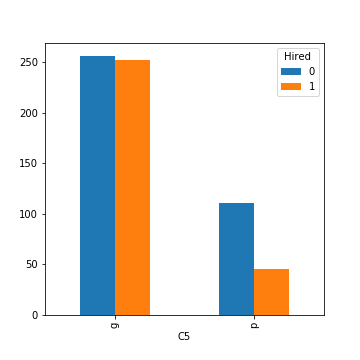

In [464]:

table2.plot(kind='bar',figsize=(5,5),stacked=False)

In [465]:
train['C6'].value_counts()


c     135
q      77
w      64
i      56
aa     53
k      49
ff     49
cc     40
m      38
x      36
d      26
e      25
j      10
?       3
r       3
Name: C6, dtype: int64

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


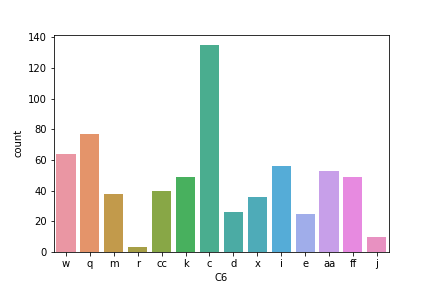

In [473]:
%matplotlib
import seaborn as sns
sns.countplot(x='C6',data=train )

<IPython.core.display.Javascript object>


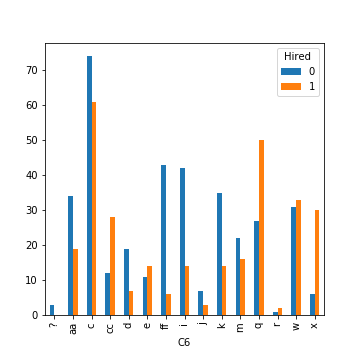

In [467]:
table3= pd.crosstab(index=train['C6'],columns=train['Hired'])
table3
table3.plot(kind='bar',figsize=(5,5),stacked=False)

In [470]:
# Get names of indexes for which column Age has value 30
indexNames = train[ train['C6'] == '?' ].index
indexNames

Int64Index([479, 539, 601], dtype='int64')

In [471]:
# Delete these row indexes from dataFrame
train.drop(indexNames , inplace=True)

<IPython.core.display.Javascript object>


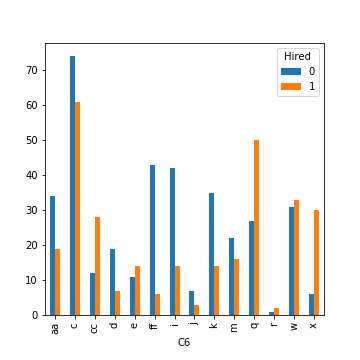

In [474]:
table3= pd.crosstab(index=train['C6'],columns=train['Hired'])
table3
table3.plot(kind='bar',figsize=(5,5),stacked=False)

In [475]:
train['C7'].value_counts()

v     388
h     138
bb     55
ff     53
z       8
j       8
dd      6
n       4
o       1
Name: C7, dtype: int64

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


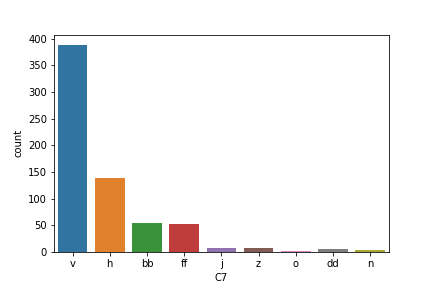

In [476]:
%matplotlib
import seaborn as sns
sns.countplot(x='C7',data=train )

In [477]:
table4= pd.crosstab(index=train['C7'],columns=train['Hired'])
table4


Hired,0,1
C7,,
bb,30,25
dd,4,2
ff,46,7
h,51,87
j,5,3
n,2,2
o,1,0
v,223,165
z,2,6


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


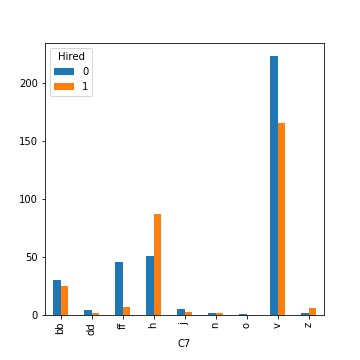

In [478]:
%matplotlib
table4.plot(kind='bar',figsize=(5,5),stacked=False)

In [479]:
# Get names of indexes for which column Age has value 30
indexNames6 = train[ train['C7'] == 'o' ].index

# Delete these row indexes from dataFrame
train.drop(indexNames6 , inplace=True)

In [480]:
train['C9'].value_counts()

t    351
f    309
Name: C9, dtype: int64

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


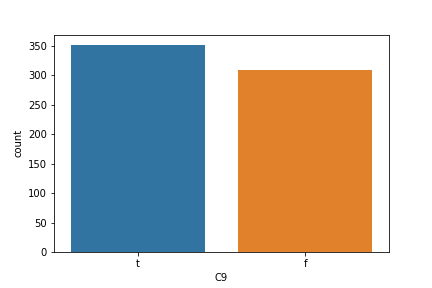

In [481]:
%matplotlib
sns.countplot(x='C9',data=train )

In [482]:
table5= pd.crosstab(index=train['C9'],columns=train['Hired'])
table5

Hired,0,1
C9,,
f,292,17
t,71,280


<IPython.core.display.Javascript object>


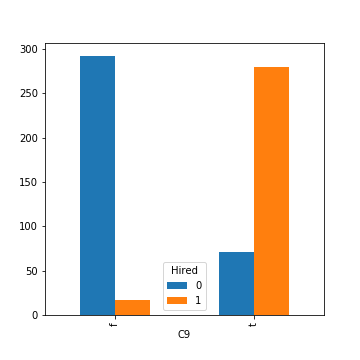

In [483]:

table5.plot(kind='bar',figsize=(5,5),stacked=False)

In [484]:
train['C10'].value_counts()

f    370
t    290
Name: C10, dtype: int64

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


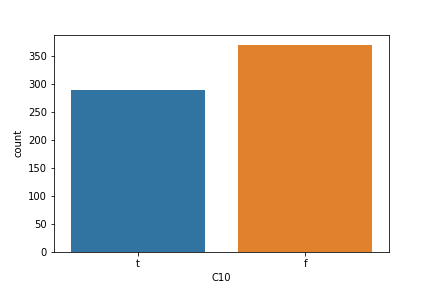

In [485]:
%matplotlib
sns.countplot(x='C10',data=train )

In [486]:
table6= pd.crosstab(index=train['C10'],columns=train['Hired'])
table6


Hired,0,1
C10,,
f,279,91
t,84,206


<IPython.core.display.Javascript object>


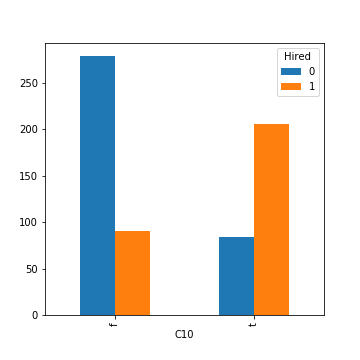

In [488]:
table6.plot(kind='bar',figsize=(5,5),stacked=False)


In [ ]:
both C9 & C10 features are reciprocal to each other bcz 

    Hired    0     1                  Hired   0   1
C10                         C9 
f          279    91        t                 292  17 
t          84     206       f                 71   280

In [489]:
train['C12'].value_counts()

f    356
t    304
Name: C12, dtype: int64

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


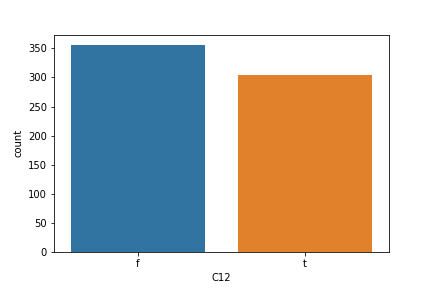

In [490]:
%matplotlib
sns.countplot(x='C12',data=train )

In [491]:

table8= pd.crosstab(index=train['C12'],columns=train['Hired'])
table8


Hired,0,1
C12,,
f,202,154
t,161,143


<IPython.core.display.Javascript object>


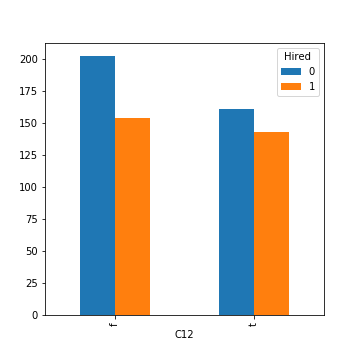

In [492]:
table8.plot(kind='bar',figsize=(5,5),stacked=False)

In [493]:
train['C13'].value_counts()

g    606
s     53
p      1
Name: C13, dtype: int64

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


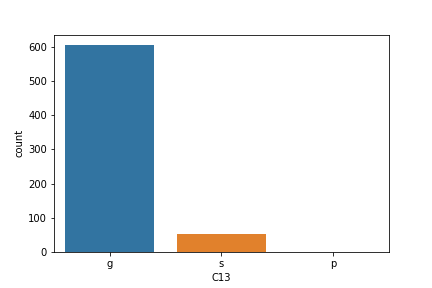

In [494]:
%matplotlib
sns.countplot(x='C13',data=train)

In [495]:

table9= pd.crosstab(index=train['C13'],columns=train['Hired'])
table9


Hired,0,1
C13,,
g,323,283
p,1,0
s,39,14


<IPython.core.display.Javascript object>


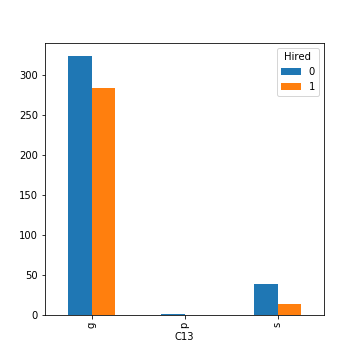

In [496]:
table9.plot(kind='bar',figsize=(5,5),stacked=False)

In [497]:
# Get names of indexes for which column Age has value 30
indexNames6 = train[ train['C13'] == 'p' ].index

# Delete these row indexes from dataFrame
train.drop(indexNames6 , inplace=True)


In [498]:
#separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 7 numeric and 9 categorical columns in train data


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


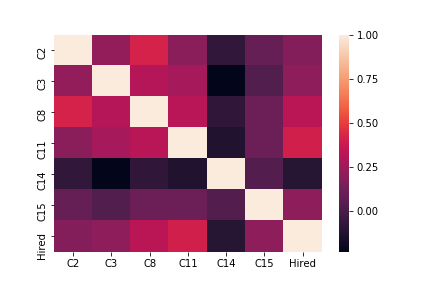

In [499]:
%matplotlib
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [500]:
print (corr['Hired'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Hired'].sort_values(ascending=False)[-5:]) #last 5 values

Hired    1.000000
C11      0.408095
C8       0.332383
C3       0.209449
C15      0.209340
C2       0.179321
C14     -0.101639
Name: Hired, dtype: float64 

----------------------
C8     0.332383
C3     0.209449
C15    0.209340
C2     0.179321
C14   -0.101639
Name: Hired, dtype: float64


Here we see that the C11 feature is 40% correlated with the target variable.

In [501]:
train.duplicated().sum()

0

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


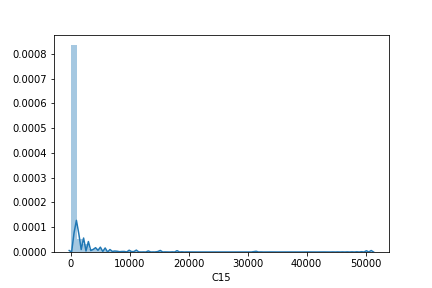

In [502]:
#C15
%matplotlib
import seaborn as sns
sns.distplot(train['C15'])

From above plot shows mostly 3 or foyr values lies between above 20000

In [504]:
train['C15'].max(),train['C15'].min()

(51100, 0)

In [505]:
indexNames3 = train[ train['C15'] >20000 ].index
indexNames3

Int64Index([6, 65, 132], dtype='int64')

In [506]:
train.drop(indexNames3, inplace=True)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


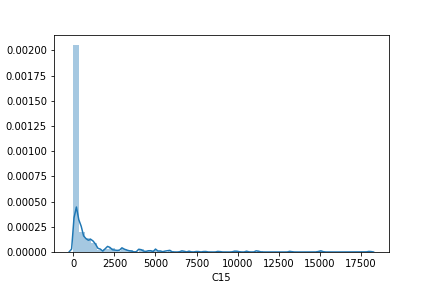

In [507]:
%matplotlib
import seaborn as sns
sns.distplot(train['C15'])

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


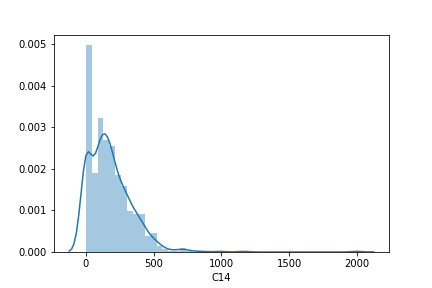

In [508]:
%matplotlib
import seaborn as sns
sns.distplot(train['C14'])

In [ ]:
From the above plot shows outliers bcz very less count of values is more then 800

In [509]:
train['C14'].max(),train['C14'].min()

(2000, 0)

In [510]:
indexNames4 = train[ train['C14'] >800 ].index
indexNames4

Int64Index([72, 327, 407, 572], dtype='int64')

In [511]:
train.drop(indexNames4, inplace=True)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


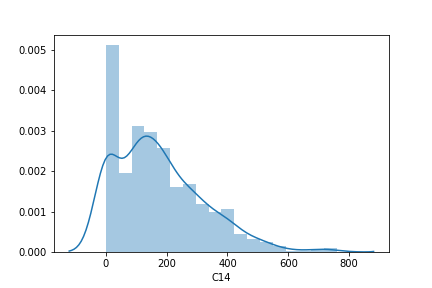

In [512]:
%matplotlib
import seaborn as sns
sns.distplot(train['C14'])

In [513]:
train.shape

(652, 16)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


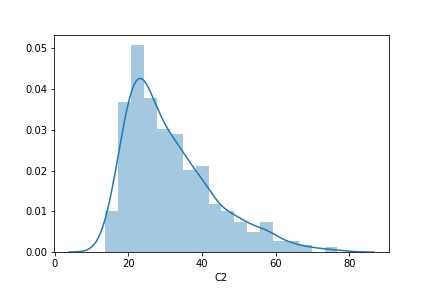

In [514]:
%matplotlib
import seaborn as sns
sns.distplot(train['C2'])

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


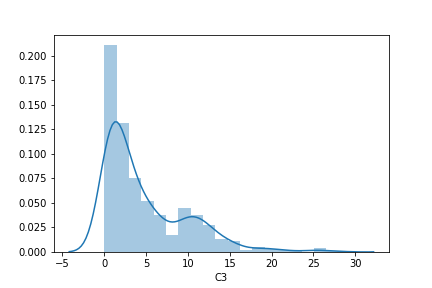

In [515]:
%matplotlib
import seaborn as sns
sns.distplot(train['C3'])

In [516]:
train.dtypes

C1        object
C2       float64
C3       float64
C4        object
C5        object
C6        object
C7        object
C8       float64
C9        object
C10       object
C11        int64
C12       object
C13       object
C14        int32
C15        int64
Hired      int64
dtype: object

In [517]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in train.columns.values:

       if train[col].dtypes=='object':
            data = train[col]
            le.fit(data.values)
            train[col]=le.transform(train[col])
       

In [518]:
train.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,2,30.83,0.000,0,0,12,6,1.25,1,1,1,0,0,202,0,1
1,1,58.67,4.460,0,0,10,3,3.04,1,1,6,0,0,43,560,1
2,1,24.50,0.500,0,0,10,3,1.50,1,0,0,0,0,280,824,1
3,2,27.83,1.540,0,0,12,6,3.75,1,1,5,1,0,100,3,1
4,2,20.17,5.625,0,0,12,6,1.71,1,0,0,0,1,120,0,1


In [520]:
train.dtypes

C1         int32
C2       float64
C3       float64
C4         int32
C5         int32
C6         int32
C7         int32
C8       float64
C9         int32
C10        int32
C11        int64
C12        int32
C13        int32
C14        int32
C15        int64
Hired      int64
dtype: object

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


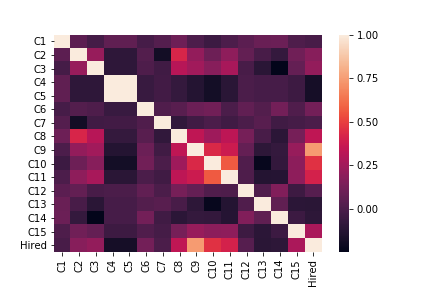

In [521]:
%matplotlib
#correlation plot
corr = train.corr()
sns.heatmap(corr)

In [522]:
print (corr['Hired'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Hired'].sort_values(ascending=False)[-5:]) #last 5 values

Hired    1.000000
C9       0.744559
C10      0.462760
C11      0.409729
C8       0.338829
C15      0.279173
C3       0.212385
C2       0.179949
C6       0.120810
C12      0.032070
C7      -0.000383
C1      -0.011938
C14     -0.100310
C13     -0.106620
C5      -0.177250
Name: Hired, dtype: float64 

----------------------
C1    -0.011938
C14   -0.100310
C13   -0.106620
C5    -0.177250
C4    -0.177250
Name: Hired, dtype: float64


#from the above that it shows C9 and C10 Have more correlation

In [531]:
tt.describe()

,C3,C8,C11,C15,Hired
count,690.000000,690.000000,690.00000,690.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,0.444928
std,4.978163,3.346513,4.86294,5210.102598,0.497318
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.165000,0.00000,0.000000,0.000000
50%,2.750000,1.000000,0.00000,5.000000,0.000000
75%,7.207500,2.625000,3.00000,395.500000,1.000000
max,28.000000,28.500000,67.00000,100000.000000,1.000000


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


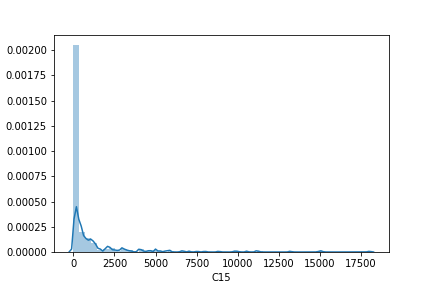

In [535]:
%matplotlib
sns.distplot(train['C15'])

In [538]:
train.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,2,30.83,0.000,0,0,12,6,1.25,1,1,1,0,0,202,0,1
1,1,58.67,4.460,0,0,10,3,3.04,1,1,6,0,0,43,560,1
2,1,24.50,0.500,0,0,10,3,1.50,1,0,0,0,0,280,824,1
3,2,27.83,1.540,0,0,12,6,3.75,1,1,5,1,0,100,3,1
4,2,20.17,5.625,0,0,12,6,1.71,1,0,0,0,1,120,0,1


In [546]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 30)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [523]:
X =train.loc[:, train.columns != 'Hired']
y = train.loc[:, train.columns == 'Hired']

In [565]:
X.shape

(652, 15)

In [564]:
X.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,2,30.83,0.000,0,0,12,6,1.25,1,1,1,0,0,202,0
1,1,58.67,4.460,0,0,10,3,3.04,1,1,6,0,0,43,560
2,1,24.50,0.500,0,0,10,3,1.50,1,0,0,0,0,280,824
3,2,27.83,1.540,0,0,12,6,3.75,1,1,5,1,0,100,3
4,2,20.17,5.625,0,0,12,6,1.71,1,0,0,0,1,120,0


In [525]:
y.head()

,Hired
0,1
1,1
2,1
3,1
4,1


In [548]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
svm= LinearSVC()
rfe = RFE(svm, 15)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# create the RFE model for the svm classifier 
# and select attributes

In [566]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [569]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [570]:
y_pred = logreg.predict(X_test)

In [571]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [572]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.864


In [573]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[95 17]
 [ 9 75]]


In [ ]:
The result is telling us that we have 95+17 correct predictions and 9+75 incorrect predictions.

<IPython.core.display.Javascript object>


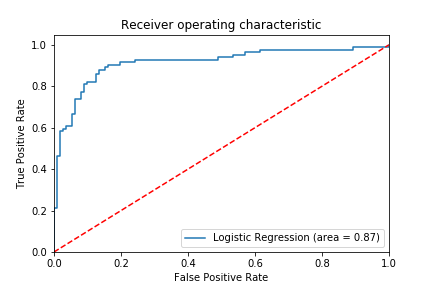

In [576]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [577]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
svm =  LinearSVC()
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [579]:
y_pred = svm.predict(X_test)

In [581]:
print('Accuracy of svm classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of svm classifier on test set: 0.73


In [ ]:
#taking only more correlated features in train data
C9       0.744559
C10      0.462760
C11      0.409729
C8       0.338829
C15      0.279173

In [582]:
traindata=train[['C9','C10','C11','C8','C15']]

In [584]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(traindata, y, test_size=0.3, random_state=0)

In [585]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [586]:
y_pred = logreg.predict(X_test1)

In [587]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.85


In [ ]:
#catboost model

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import catboost as cgb
from bayes_opt import BayesianOptimization

import warnings
warnings.filterwarnings('ignore')

In [199]:
trainx = train.drop(columns=['Hired'],axis=1)
trainy = train['Hired']

In [200]:
trainx.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0


In [201]:
trainy.head()

0    1
1    1
2    1
3    1
4    1
Name: Hired, dtype: int64

In [203]:


X_train, X_val, y_train, y_val   = train_test_split(X,trainy, test_size=0.2, random_state=1)

((532, 15), (134, 15))

In [211]:

from catboost import CatBoostClassifier, Pool

cb_model = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='Logloss',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model.fit(X_train, y_train,
             eval_set=(X_val,y_val),
             cat_features=cat_data,
             use_best_model=True,
             verbose=True)

0:	learn: 0.6773685	test: 0.6773722	best: 0.6773722 (0)	total: 34.1ms	remaining: 17s
75:	learn: 0.3065053	test: 0.3577316	best: 0.3577316 (75)	total: 4.32s	remaining: 24.1s
150:	learn: 0.2598513	test: 0.3390908	best: 0.3389072 (146)	total: 14.4s	remaining: 33.3s
225:	learn: 0.2370829	test: 0.3345516	best: 0.3343320 (212)	total: 23.2s	remaining: 28.2s
300:	learn: 0.2240676	test: 0.3311574	best: 0.3310813 (298)	total: 28s	remaining: 18.5s
375:	learn: 0.2094822	test: 0.3313995	best: 0.3307780 (304)	total: 35.7s	remaining: 11.8s
450:	learn: 0.1813588	test: 0.3313387	best: 0.3302039 (393)	total: 57.5s	remaining: 6.24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3302038678
bestIteration = 393

Shrink model to first 394 iterations.
